# Libraries : 

In [78]:
import six
import pandas               as pd
import numpy                as np
from IPython.display        import display
import matplotlib.pyplot    as plt
import seaborn              as sns
import math
import folium
import progressbar
%matplotlib inline
sns.set(style='white',palette='deep')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 100)
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy              import stats
from scipy.stats        import skew, norm
from scipy.special      import boxcox1p
from scipy.stats.stats  import pearsonr

print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model   import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble       import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge   import KernelRidge
import xgboost              as xgb

print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline           import make_pipeline
from sklearn.preprocessing      import RobustScaler
from sklearn.preprocessing      import StandardScaler
from sklearn.preprocessing      import LabelEncoder
from sklearn.feature_selection  import SelectFromModel
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection  import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters

from sklearn                    import model_selection
from sklearn.model_selection    import KFold
from sklearn.model_selection    import cross_val_score, train_test_split
from sklearn.model_selection    import GridSearchCV
from sklearn.model_selection    import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
sns.set_style('darkgrid')
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


In [136]:
import textblob
from textblob import Blobber
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Sentiment functions :

In [137]:
def compute_sentiment_score(text: str, lang_module: str='en_textblob') -> float:
    """Compute a sentiment score using pre-trained lexicons: TextBlob or Vader.
    Output a score from -1 to 1, depending if the text is negative neutral
    of positive.
    Args:
        tokens_or_txt: the text to be processed
        lang_module: ('fr_textblob','en_textblob','en_vader')
    Returns:
        float : Polarity score from -1 to 1
    """
    output = ''
    if lang_module is 'fr_textblob':
        tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
        blob = tb(text)
        output = blob.sentiment[0]

    elif lang_module is 'en_textblob':
        blob = TextBlob(text)
        output = blob.sentiment.polarity

    elif lang_module is 'en_vader':
        analyser = SentimentIntensityAnalyzer()
        snt = analyser.polarity_scores(text)
        output = snt['compound']
    else:
        raise ValueError('Please enter a valid module name!')

    assert output != ''
    return output

# Let's get Popcorn chat : 

In [46]:
import pandas as pd
import numpy as np
from nautilus_nlp.models.sentiment_detector import compute_sentiment_score

data_path = '~/Documents/github/twitch-ai/data/csv/'
sample_data = 'popcorn_18022020.csv'

In [54]:
from typing import List
import progressbar

In [91]:
df: pd.DataFrame = pd.read_csv(data_path+sample_data)

In [92]:
df=df.drop(columns=['Unnamed: 0'])

In [93]:
df = df.dropna()

In [94]:
def _get_only_content(df: pd.DataFrame) -> List:
    df_temp = df[['Content']]
    df_temp = df_temp.dropna()
    return list(df_temp.values)

content_list = _get_only_content(df)

In [95]:
# Computing the sentiment for each message : 
sentiment_content = []
for sentence in progressbar.progressbar(content_list):
    sentiment = compute_sentiment_score(list(sentence),lang_module="fr_textblob") + compute_sentiment_score(list(sentence),lang_module="en_textblob")
    sentiment /= 2.
    sentiment_content.append(sentiment)

100% (25165 of 25165) |##################| Elapsed Time: 0:00:10 Time:  0:00:10


In [96]:
df['Sentiment'] = np.array(sentiment_content)

In [63]:
# Saving the csv : 
df.to_csv('experience1_popcorn_setup=raw.csv')

In [100]:
# Keeping only the non neutral message (~20%)
df_no_neutral = df[df['Sentiment'] != 0]

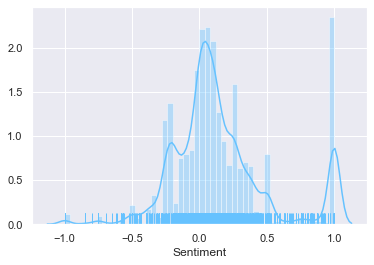

In [101]:
sns.distplot(df_no_neutral['Sentiment'],rug=True)

In [105]:
def _get_group(time):
    hour = time.hour
    minute = time.minute
    nb_minute = hour*60+minute 
    return int(nb_minute//5)

df_no_neutral['Time_grouping'] = df['Time'].apply(lambda x: _get_group(x))

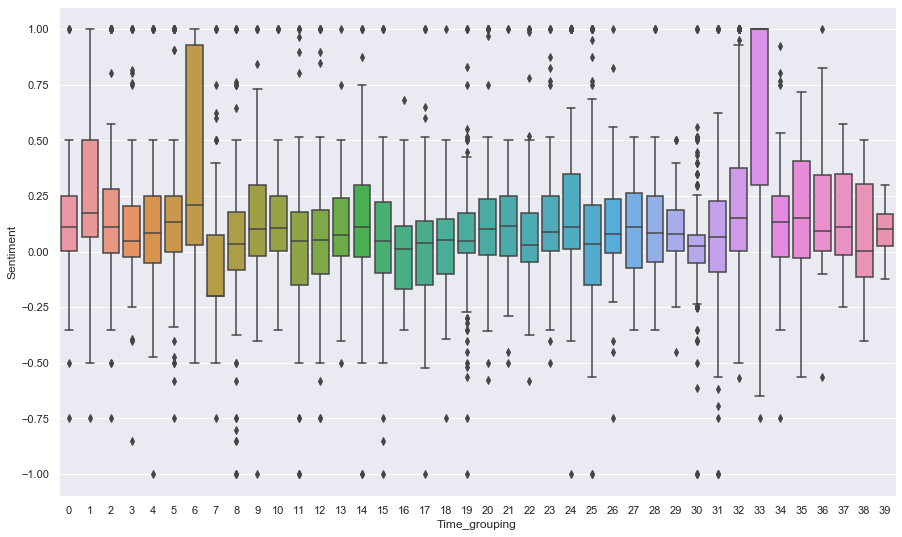

In [129]:

plt.subplots(figsize=(15, 9))
sns.boxplot(x='Time_grouping',y='Sentiment',data=df_no_neutral)

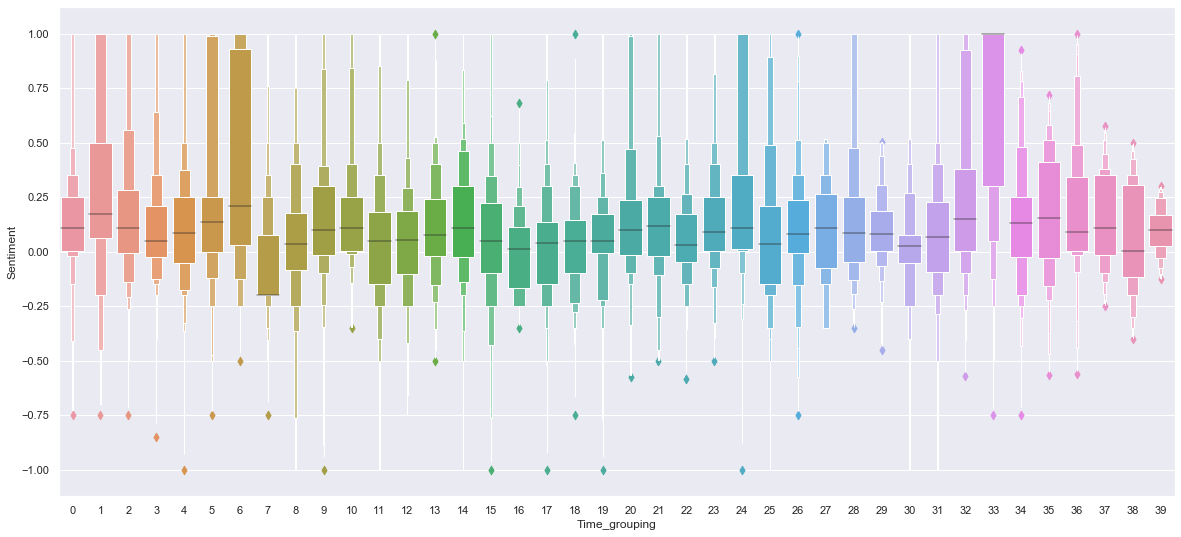

In [132]:
plt.subplots(figsize=(20, 9))
sns.boxenplot(x='Time_grouping',y='Sentiment',data=df_no_neutral)

In [ ]:
### Some vizu : 
def compare_distribution(df: pd.DataFrame,x: str,y: str):
    sns.set(style="darkgrid", rc={"axes.facecolor": (0, 0, 0, 0)})

    pal = mycols#sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df, row=y, hue=y, aspect=15, height=.5, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot,x, clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot,x, clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, x)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

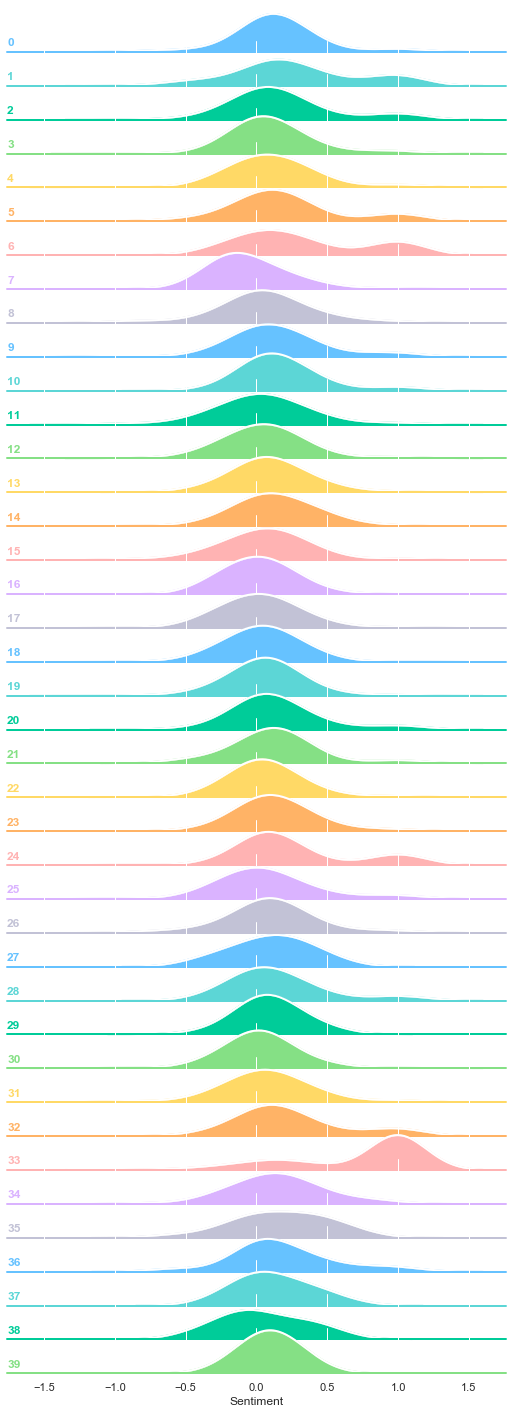

In [135]:
#plt.subplots(figsize=(9,20))
compare_distribution(df=df_no_neutral,x='Sentiment',y='Time_grouping')